In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datas/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [5]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
X_train = X.values
y_train = y.values

<Axes: xlabel='Outcome', ylabel='Age'>

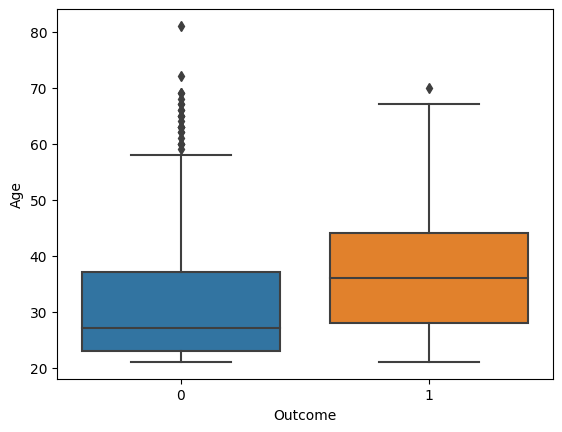

In [8]:
sns.boxplot(x=df['Outcome'],y=df['Age'])

In [9]:

def log_likelihood_cost(X, y, w, b):
    m = X.shape[0]  # Number of training examples

    z = np.dot(X, w) + b
    pred = sigmoid(z)

    # Avoid log(0) and log(1) by adding a small epsilon
    epsilon = 1e-15
    pred = np.clip(pred, epsilon, 1 - epsilon)

    # Calculate the log-likelihood cost function
    loss = -y * np.log(pred) - (1 - y) * np.log(1 - pred)
    cost = np.sum(loss) / m

    return cost

In [26]:
# def sigmoid(z):
    
#     g=1/(1+np.exp(-z))
    
#     return g
import numpy as np
from scipy.special import expit

def sigmoid(z):
    return expit(z)

# Now use the sigmoid function in your logistic regression implementation


In [27]:
def compute_gradient(X,y,w,b):

    m = len(X.T)
    
    # predict y=wx+b
    pred = sigmoid(np.dot(w,X) + b) #X shape must be (8,768)
    diff = pred - y
   
    dj_dw = np.dot(X,diff) / m
    dj_db = np.sum(diff) / m
    return dj_dw,dj_db

In [28]:
# compute_gradient(X_train.T,y_train,np.random.rand(X_train.shape[1]),1)

In [109]:
def gradient_descent(X,y,cost_function,gradient_function,number_of_iterations,learning_rate):

    costs = []
    # w_in = np.random.rand(X.shape[1])
    w_in = np.zeros(X.shape[1])
    b_in = 0.0
    for i in range(number_of_iterations):
        
        dj_dw,dj_db = gradient_function(X.T,y,w_in,b_in)
        w_in = w_in - learning_rate * dj_dw 
        b_in = b_in - learning_rate * dj_db

        if i%100 == 0:
            
            cost = log_likelihood_cost(X,y,w_in,b_in)
            print(f"Cost at iteration {i} : ",cost)

    return w_in,b_in

In [138]:
def predict(X,w,b) :
    Z = 1 / ( 1 + np.exp( - ( X.dot( w) + b ) ) )
    Y = np.where( Z > 0.3, 1, 0 )
    return Y

In [145]:
w,b=gradient_descent(X_train[:500,:],y_train[:500],None,compute_gradient,99,0.01)

Cost at iteration 0 :  9.172941051997215


In [146]:
log_likelihood_cost(X,y,w,b)

11.564586846384225

In [147]:
predict(X_train[500:,:],w,b)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [148]:
Y_pred = predict(X_train[500:,:],w,b)
correctly_classified = 0
for count in range( np.size( Y_pred ) ) :
    if y_train[count] == Y_pred[count] :
        correctly_classified = correctly_classified + 1

print( "Accuracy on test set by our implementation of Logistic Reg model :", ( correctly_classified / count ) * 100 )


Accuracy on test set by our implementation of Logistic Reg model : 62.172284644194754


In [137]:
np.count_nonzero(y_train)

268

In [ ]:
np